# 저장

* Last Updated: 20170410 20161006

## S.1 학습내용

### S.1.1 목표

* 데이터를 json, csv 파일로 쓰고, 읽을 수 있다.
* 데이터를 NoSql로 저장하고, 사용할 수 있다.

### S.1.2 목차

* O.2 인코딩
* O.2.1 한글 인코딩
* O.2.1 운영체제의 인코딩
* O.2.1 Python의 인코딩
* S.3 파일
* S.3.1 Python의 파일
* S.3.2 JSON 파일
* S.3.3 csv 파일
* S.4 MongoDB
* S.4.1 설치
* S.4.2 MongoDB shell
* S.4.3 pymongo
* S.5 CouchDB
* S.5.1 설치
* S.5.2 cURL
* S.5.3 데이터베이스
* S.5.4 View
* S.5.5 Shows
* S.5.6 Replication

### S.1.3 문제

* 문제 S-1: JSON 파일 쓰기
* 문제 S-2: JSON 파일 읽기
* 문제 S-3: url에서 JSON을 읽기
* 문제 S-4: url에서 파일을 가져와 자료구조에 저장하기
* 문제 S-5: MongDB에 'id', '이름'을 저장하고, 조회하는 프로그램을 실행하기
* 문제 S-6: Python으로 MongoDB Persons 조회하기
* 문제 S-7: CouchDB로 html 페이지 저장하기

### S.1.4 연습

* 웹크롤링 데이터를 MongoDB로 저장한다.

## S.2 인코딩

* 입출력은 바이트와 텍스트로 구분할 수 있다.
    * 바이트는 8비트 단위를 기본으로 입출력을 한다.
    * 텍스트는 바이트를 인코딩하는 방식을 정해서, 보통 'utf-8' 문자열로 입출력을 한다.

용어 | 설명 | 예
-----|-----|-----
문자 | 텍스트의 가장 작은 단위, Character | 'A' 'B'
문자열 | 문자의 집합 | "Hello"
바이트 | 1 byte는 8 bits로 구성, 문자를 표현하는 코드 값 Code points이 된다. | 1 byte는 0~255 사이의 코드 값
인코딩 | 문자를 코드 값 Code points로 변환. 디코딩은 사람이 인식할 수 있는 문자로 변환 | 'a' = 61 (ASCII 코드 값)

* 코드 값 Code point

인코딩 방식 | 코드 값
----------|----------
ASCII | 128
Extended ASCII | 256
Unicode | 1,114,112

* utf-8
    * 가장 많이 사용하는 unicode 인코딩 방식이다. 위키피디아에 따르면, 2017년 기준 웹의 약 90%가 utf-8을 사용한다.
    * 가변 길이, 4 바이트까지
    * 처음 1~128은 ASCII와 동일하게 구성한다.
    * HTML, XML은 utf-8을 기본 설정으로 사용한다.

### S.2.1 한글 인코딩

* 여러 언어가 쓰인 페이지를 읽어서 화면에 올바르게 읽혔는지 살펴본다.
* curl로 읽어, 웹브라우저에서는 유니코드의 지원에 따라 깨지지 않고 올바르게 나타날 수 있다.

In [75]:
!curl http://httpbin.org/encoding/utf8

<h1>Unicode Demo</h1>

<p>Taken from <a
href="http://www.cl.cam.ac.uk/~mgk25/ucs/examples/UTF-8-demo.txt">http://www.cl.cam.ac.uk/~mgk25/ucs/examples/UTF-8-demo.txt</a></p>

<pre>

UTF-8 encoded sample plain-text file
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Markus Kuhn [ˈmaʳkʊs kuːn] <http://www.cl.cam.ac.uk/~mgk25/> — 2002-07-25


The ASCII compatible UTF-8 encoding used in this plain-text file
is defined in Unicode, ISO 10646-1, and RFC 2279.


Using Unicode/UTF-8, you can write in emails and source code things such as

Mathematics and sciences:

  ∮ E⋅da = Q,  n → ∞, ∑ f(i) = ∏ g(i),      ⎧⎡⎛┌─────┐⎞⎤⎫
                                            ⎪⎢⎜│a²+b³ ⎟⎥⎪
  ∀x∈ℝ: ⌈x⌉ = −⌊−x⌋, α ∧ ¬β = ¬(¬α ∨ β),    ⎪⎢⎜│───── ⎟⎥⎪
                                            ⎪⎢⎜⎷ c₈   ⎟⎥⎪
  ℕ ⊆ ℕ₀ ⊂ ℤ ⊂ ℚ ⊂ ℝ ⊂ ℂ,                   ⎨⎢⎜       ⎟⎥⎬
                                            ⎪⎢⎜ ∞     ⎟⎥⎪
  ⊥ < a ≠ b ≡ c ≤ d ≪ ⊤ ⇒ (⟦A⟧ ⇔ ⟪B⟫),      ⎪⎢⎜ ⎲     ⎟⎥⎪
                                         

* Python 라이브러리 'requests'를 사용하면 어떤지 살펴 보자.
* 앞 500문자를 읽었다.
    * 맨 앞 'u'는 unicode라는 의미, 따옴표 안의 문자열이 유니코드이다.

In [79]:
import requests
r = requests.get("http://httpbin.org/encoding/utf8")
r.text[0:500]

u'<h1>Unicode Demo</h1>\n\n<p>Taken from <a\nhref="http://www.cl.cam.ac.uk/~mgk25/ucs/examples/UTF-8-demo.txt">http://www.cl.cam.ac.uk/~mgk25/ucs/examples/UTF-8-demo.txt</a></p>\n\n<pre>\n\nUTF-8 encoded sample plain-text file\n\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\n\nMarkus Kuhn [\u02c8ma\u02b3k\u028as ku\u02d0n] <http://www.cl.cam.ac.uk/~mgk25/> \u2014 2002-07-25\n\n\nThe ASCII compatible UTF-8 encoding used in this plain-text file\nis defined in Unicode, ISO 10646-1, and RFC 2279.\n\n\nUsing Unicode/UTF-8, you can write in emails and so'

### S.2.2 운영체제의 인코딩

* 운영체제에서 사용하는 인코딩 방식
    * unicode를 사용하는 것이 문제를 줄일 수 있다.
    * locale을 'utf-8'로 정의한다.


In [4]:
import locale
locale.getdefaultlocale()

('en_US', 'UTF-8')

* 운영체제 locale의 설정을 확인한다.
* 윈도우에서는 '제어판 > 언어' 또는 명령창에서 'systeminfo.exe'를 사용하면 '시스템 로캘', '입력 로캘'을 보여준다.
* 주요 설정

구분 | 설명
-----|-----
LC_ALL | LC_ALL 값은 모든 기타 환경 변수의 값보다 우선
LC_CTYPE | 문자 분류와 대소문자 변환을 정의
LC_MONETARY | 통화 숫자 정보의 형식을 정의
LC_NUMERIC | 숫자, 비-통화 형식을 정의
LC_TIME | 날짜 및 시간 형식을 정의
LANG | LC_ALL이 설정되지 않은 경우, LANG 값은 언어, 문자 세트, 정렬 순서를 판별

In [86]:
!locale

LANG=en_US.UTF-8
LANGUAGE=en_US:en
LC_CTYPE="en_US.UTF-8"
LC_NUMERIC=ko_KR.UTF-8
LC_TIME=ko_KR.UTF-8
LC_COLLATE="en_US.UTF-8"
LC_MONETARY=ko_KR.UTF-8
LC_MESSAGES="en_US.UTF-8"
LC_PAPER=ko_KR.UTF-8
LC_NAME=ko_KR.UTF-8
LC_ADDRESS=ko_KR.UTF-8
LC_TELEPHONE=ko_KR.UTF-8
LC_MEASUREMENT=ko_KR.UTF-8
LC_IDENTIFICATION=ko_KR.UTF-8
LC_ALL=


* Python print문은 올바르게 출력한다.
* Python이 유니코드를 올바르게 출력하도록 설정되어 있기 때문이다.

In [83]:
teststr=r.text[0:500]
print teststr

<h1>Unicode Demo</h1>

<p>Taken from <a
href="http://www.cl.cam.ac.uk/~mgk25/ucs/examples/UTF-8-demo.txt">http://www.cl.cam.ac.uk/~mgk25/ucs/examples/UTF-8-demo.txt</a></p>

<pre>

UTF-8 encoded sample plain-text file
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Markus Kuhn [ˈmaʳkʊs kuːn] <http://www.cl.cam.ac.uk/~mgk25/> — 2002-07-25


The ASCII compatible UTF-8 encoding used in this plain-text file
is defined in Unicode, ISO 10646-1, and RFC 2279.


Using Unicode/UTF-8, you can write in emails and so


### S.2.2 Python의 인코딩

* Python3은 utf-8을 기본 설정으로 사용한다 (when LC_CTYPE is unicode-aware)
* Python print문은 운영체제에서 설정된, locale.getpreferredencoding()을 사용한다.
    * locale은 utf-8을 사용하므로, 출력하면 unicode를 이해하고 출력한다.



In [8]:
import sys, locale
print locale.getpreferredencoding()
print sys.getdefaultencoding()
print sys.getfilesystemencoding()
print sys.stdin.encoding
print sys.stdout.encoding

UTF-8
ascii
UTF-8
None
UTF-8


* Python os.environ의 LANG이 설정되어 있다.
* 이 값은 운영체제 locale.LANG과 동일한 값을 가지고 있다.

In [9]:
import os
os.environ['LANG']

'en_US.UTF-8'

* Python의 기본 encoding을 변경할 수 있다.
* 환경변수를 정해 놓을 수 있다.
```
export PYTHONIOENCODING=utf-8
```

In [ ]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.utf-8')

In [ ]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

* '한'은 자음, 모음, 받침으로 표현

데이터 타잎 | 설명 | 예
-----|-----|-----
str | byte로서 1~128 범위를 가진다. \x로 시작 2자리 (1바이트) | '한' '\xed\x95\x9c'
unicode | 최대 4 바이트, \u로 시작 | '한' u'\ud55c'

* 'str' 인코딩의 주의
    * 1~128 사이 ASCII 문자로 인코딩할 경우 문제가 없다.
    * 그 이상은 Non-ASCII 문자로 인코딩된다.

In [88]:
str('한')

'\xed\x95\x9c'

In [89]:
u'한'

u'\ud55c'

* 한글은 Non-ASCII이다. ASCII에서 unicode로 encoding할 수 없다. 
* '한'은 ASCII 코드 값 Code points가 없기 때문에 오류가 발생한다.

In [91]:
'한'.encode('utf-8')

UnicodeDecodeError: 'ascii' codec can't decode byte 0xed in position 0: ordinal not in range(128)

In [90]:
(u'한').encode('utf-8')

'\xed\x95\x9c'

* stdout encoding 'utf-8'에 따라 출력한다.

In [92]:
print u'한'

한


## S.3 파일

### S.3.1 Python의 파일

* 'File' 객체를 사용한다 (C언어의 stdio에서 제공하는 file 참조)
* IOError 예외가 발생할 수 있다.
* 'File' 객체는 iterator, factory 패턴을 구현하고 있다.
* next()함수는 iterator이다.
* 생성자 file()을 직접 사용하여 생성할 수 있으나, 'factory' 함수를 사용하는 것을 권고한다.

함수 | 설명 | 반환 returns
-----|-----|-----
open() | built-in' 함수이다. 파일명과 선택적으로 mode, buffering을 정할 수 있다. | File 객체
io.open() | stream을 처리하는 'io' 라이브러리 함수이다. 추가적인 인자로 encoding, newline을 설정할 수 있다. | File 객체

In [1]:
import iplantuml

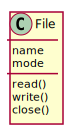

In [2]:
%%plantuml
@startuml
class File {
    name
    mode
    encoding
    closed
    file()
    read()
    write()
    flush()
    next()
    close()
}
@enduml

* mode

mode | 설명
-----|-----
r | 읽기 (default)
w | 쓰기
a | 뒤에 붙이기
b | 바이너리 bytes
t | 텍스트 (default)
+ | 수정

### S.3.2 JSON 파일

* JSON은 데이터를 저장하는 형식이다.
* JSON은 schema free, 저장할 데이터 구조를 정하지 않아도 된다. 참고로 XML은 XSD를 사용해 구조를 미리 정할 수 있다.
* JSON은 자바스크립트에서 사용하는 형식이다 (JavaScript Object Notation).
* Javascript뿐만 아니라, 다른 프로그래밍 언어도 JSON을 많이 사용한다.

* JSON 형식
    * 형식은 key와 value의 쌍으로 이루어져 있다.
    * 콜론으로 구분하여 key, value를 구성한다.
    * id='405'의 JSON 예:
```
"id": "405"
```


* JSON 객체
    * JSON 객체로 key, value를 저장할 수 있다.
    * key가 ASCII문자이면 'str', non-ASCII 문자가 포함되면 'unicode'로 변환된다.
    * JSON은 Python dict와 서로 호환된다.
    * id:405 및 name:js인 JSON 객체의 예:
```
{ "id": "405", "name": "js" }
```


* key의 데이터타잎을 확인한다. key가 한글일 경우, 즉 Non-ASCII문자를 포함하고 있으면 'unicode'를 출력한다.
* '\x'는 16진수, '\u'는 unicode이다.
* ord()는 ordinal integer, hex()는 16진수를 출력하는 함수이다.

In [124]:
import json

user1={ "id": "405", "name": "js" }
user2={ "id": "405", "이름": "js" }
user3={ "id": "405", u"이름": "js" }

print user1
print user2
print user3

{'id': '405', 'name': 'js'}
{'id': '405', '\xec\x9d\xb4\xeb\xa6\x84': 'js'}
{u'\uc774\ub984': 'js', 'id': '405'}


In [10]:
print '\xec\x9d\xb4'
print ord('\xec')
print hex(ord('\xec'))

이
236
0xec


In [122]:
print type(user1)

<type 'dict'>


* JSON Array
    * value가 배열을 가질 수 있다. 이 경우 배열은 Python list로 구성한다.
```
[ { ... } ]
```

    * key는 'Persons', value는 배열로 구성한 예:
```
{"Persons":[
    {"id":"405", "name":"js1"},
    {"id":"406", "name":"js2"},
]}
```

In [1]:
import json

p={"Persons":[
    {"id":"405", "name":"js1"},
    {"id":"406", "name":"js2"},
]}

print p

{'Persons': [{'id': '405', 'name': 'js1'}, {'id': '406', 'name': 'js2'}]}


* JSON 파일 함수
    * 함수의 맨끝 's'를 string으로 생각하면 편리하다.

함수 | 설명
-----|-----
loads() | JSON을 문자열에서 읽기
dumps() | JSON을 문자열로 쓰기
load() | JSON을 파일에서 읽기
dump() | JSON을 파일에 쓰기


## 문제 JSON-1: JSON 파일 쓰기

* 파일 확장자 .json
* 문자열로 변환할 경우, dumps()를 사용한다.


In [23]:
import json

p={"Persons":[
    {"id":"405", "이름":"js1"},
    {"id":"406", "이름":"js2"},
]}

print json.dumps(p)

{"Persons": [{"id": "405", "\uc774\ub984": "js1"}, {"id": "406", "\uc774\ub984": "js2"}]}


* key가 한글이면 Non-ASCII이므로 unicode로 변환된다.

In [24]:
import io, json
with io.open('data/ds_save_persons.json', 'w', encoding='utf8') as json_file:
    data=json.dumps(p, json_file, ensure_ascii=False, encoding='utf8')
    json_file.write(data)

* dump()는 파일에 바로 쓴다.
    * 버그: Python 2.x 문제가 있다. TypeError가 발생한다 ('unicode'대신 'str'을 사용해야 한다는 오류)
    * io.open() 대신 open()을 사용하면 오류를 피할 수 있다. Python 3으로 전환되면서 문제가 있는 듯하다.
        * Python 2.6에서 'unicode'처리를 위해 'io' 모듈을 추가해서 codes.open()를 대체했다.
        * Python 3.x에서는 io.open()을 사용하는 것을 권고하고 있다.


In [26]:
import os, io, json
with io.open(os.path.join('data','ds_save_persons.json'), 'w') as json_file:
    json.dump(p, json_file, encoding="utf-8")


TypeError: write() argument 1 must be unicode, not str

* with 명령어는 설정을 정의하는 명령어 이다.
* with 명령어로 생성된 파일은 close()를 호출해서 닫지 않아도 된다.

In [27]:
import io, json, os
with open(os.path.join('data','ds_save_persons.json'), 'w') as json_file:
    json.dump(p, json_file)

In [28]:
!cat data/ds_save_persons.json

{"Persons": [{"id": "405", "\uc774\ub984": "js1"}, {"id": "406", "\uc774\ub984": "js2"}]}

In [29]:
import io, json
json_file=open(os.path.join('data','ds_save_persons.json'), 'w')
json.dump(p, json_file)
json_file.close()

In [30]:
!cat data/ds_save_persons.json

{"Persons": [{"id": "405", "\uc774\ub984": "js1"}, {"id": "406", "\uc774\ub984": "js2"}]}

## 문제 JSON-2:  JSON 파일 읽기

* file에서 JSON 문자열을 읽어오는 경우


* loads()함수로 json을 읽는다.
    * Persons json을 파일에서 읽는다.
    * json.loads()는 문자열을 반환한다 ('str' 또는 'unicode').
    * 한 번 더 json.loads()를 하면, unicode -> dictionary로 변환한다.


In [2]:
import os, json
fp=open(os.path.join('data','ds_save_persons.json'),'r')
data=fp.read()

In [3]:
print data

{"Persons": [{"id": "405", "\uc774\ub984": "js1"}, {"id": "406", "\uc774\ub984": "js2"}]}


In [4]:
type(data)

str

In [6]:
pjson=json.loads(data)
print pjson

{u'Persons': [{u'\uc774\ub984': u'js1', u'id': u'405'}, {u'\uc774\ub984': u'js2', u'id': u'406'}]}


In [15]:
type(pjson)

dict

* load()는 dict를 반환한다.

In [34]:
import json
import os
with open(os.path.join('data','ds_save_persons.json')) as json_data:
    d = json.load(json_data)
    print type(d), d


<type 'dict'> {u'Persons': [{u'\uc774\ub984': u'js1', u'id': u'405'}, {u'\uc774\ub984': u'js2', u'id': u'406'}]}


* key, value에 u는 유니코드를 의미한다.

In [38]:
for p in d['Persons']:
    print p['id'], p[u'이름']

405 js1
406 js2


In [39]:
import json, ast
r = {u'name': u'A', u'primary_key': 1}
ast.literal_eval(json.dumps(r))

{'name': 'A', 'primary_key': 1}

* JSON을 url에서 읽을 경우

함수 | 설명
-----|-----
json.load(response) | file 객체와 같은 'response'를 사용해서 읽는 load() 함수
json.loads(response.read()) | response.read()에서 반환한 문자열을 읽는 loads() 함수


## 문제 JSON-3: url에서 JSON을 읽기

* url에 데이터가 저장되어 있는 구조를 먼저 확인해야 한다.
    * 사례1: list > 그 안에는 dictionary로 저장
    * 사례2: dict > meta, data > data 안에는 key없이 값만 list로 저장 (key는 meta에 저장)
* requests 라이브러리는 response를 json으로 읽는 기능을 제공한다.

```
import requests
r = requests.get(url)
r.json()
```

* 사례1: 월드컵 참가 선수 데이터
    * JSON 배열

```
[
  {
    "Competition": "World Cup",
    "Year": 1930,
    "Team": "Argentina",
    "Number": "",
    "Position": "GK",
    "FullName": "Ãngel Bossio",
    "Club": "Club AtlÃ©tico Talleres de Remedios de Escalada",
    "ClubCountry": "Argentina",
    "DateOfBirth": "1905-5-5",
    "IsCaptain": false
  },
  ...
]
```

In [1]:
import requests
_url="https://raw.githubusercontent.com/jokecamp/FootballData/master/World%20Cups/all-world-cup-players.json"
r=requests.get(_url)

In [2]:
if r.status_code==200:
    _json=r.json()

In [3]:
type(_json)

list

In [4]:
print _json[0].keys()

[u'Club', u'ClubCountry', u'Year', u'Number', u'Competition', u'DateOfBirth', u'Team', u'Position', u'FullName', u'IsCaptain']


In [5]:
print _json[0]

{u'Club': u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada', u'ClubCountry': u'Argentina', u'Year': 1930, u'Number': u'', u'Competition': u'World Cup', u'DateOfBirth': u'1905-5-5', u'Team': u'Argentina', u'Position': u'GK', u'FullName': u'\xc3ngel Bossio', u'IsCaptain': False}


* 사례2
    * New York State Baby Names, https://www.healthdata.gov/dataset/baby-names-beginning-2007

In [6]:
import requests
_url="https://health.data.ny.gov/api/views/jxy9-yhdk/rows.json?accessType=DOWNLOAD"
r=requests.get(_url)

In [7]:
_json=r.json()

* json데이터는 meta, data로 구분해서 만들어져 있슴
* data는 52252건

In [14]:
type(_json)

dict

In [16]:
_json.keys()

[u'meta', u'data']

In [17]:
_jsonList=_json['data']

In [18]:
len(_jsonList)

52252

In [19]:
print _json['data'][0]

[1, u'5DC7F285-052B-4739-8DC3-62827014A4CD', 1, 1425450997, u'714909', 1425450997, u'714909', u'{\n}', u'2013', u'GAVIN', u'ST LAWRENCE', u'M', u'9']


### S.3.3 csv 파일

* csv파일은 데이터 항목을 쉼표로 분리한 파일 Comma Separated Values
* 엑셀형식으로 이해할 수 있다.
    * '줄'을 행
    * '열'은 데이터 항목


In [63]:
import csv
 
_file = open("data/jsldata2.csv", "rb")
reader = csv.reader(_file)
 
rownum = 0
for row in reader:
    for col in row:
        print '%s' % (col),
    print
_file.close()

key1 key2 key3 value1 value1 value2
c1 one a 82 1 2
c1 one b 83 3 4
c1 one c 97 5 6
c2 one d 83 7 8
c2 two a 78 9 10
c2 two b 68 11 12
c3 two c 38 13 14
c3 two d 59 15 16
c3 two d 55 15 16


In [63]:
import csv
 
_file = open("data/jsldata2.csv", "rb")
reader = csv.reader(_file)
 
rownum = 0
for row in reader:
    for col in row:
        print '%s' % (col),
    print
_file.close()

key1 key2 key3 value1 value1 value2
c1 one a 82 1 2
c1 one b 83 3 4
c1 one c 97 5 6
c2 one d 83 7 8
c2 two a 78 9 10
c2 two b 68 11 12
c3 two c 38 13 14
c3 two d 59 15 16
c3 two d 55 15 16


## 문제 S-4: url에서 파일을 가져와 자료구조에 저장하기

* uci 기계학습 데이터 파일 읽기
* 로컬 파일을 읽는 것과 비교
* 전체 문자 수는 25,437
* 데이터는 300행 x 28열

In [8]:
import urllib2
url='http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
res=urllib2.urlopen(url)
html = res.read()
res.close()
print len(html)

25437


In [9]:
lines=html.splitlines()
data=[]
for line in lines:
    data.append(line.split())
print len(data), len(data[0])
print data[0]

300 28
['2', '1', '530101', '38.50', '66', '28', '3', '3', '?', '2', '5', '4', '4', '?', '?', '?', '3', '5', '45.00', '8.40', '?', '?', '2', '2', '11300', '00000', '00000', '2']


### 데이터 확인

* 모든 300행에대해 28개 컬럼이 있는지
* 처음 20개만 3번째 컬럼 평균내보기

In [10]:
for i in range(0,len(data)):
    if len(data[i]) != len(data[0]):
        print "wrong size at", i

In [11]:
for i in range(0,20):
    print data[i][3]

38.50
39.2
38.30
39.10
37.30
?
37.90
?
?
38.30
38.10
39.10
37.20
38.00
38.2
37.60
?
37.50
37.60
39.4


In [12]:
sum=0
cnt=0
for i in range(0,20):
    val=data[i][3]
    if val is '?':
        print i,"None"
    else:
        sum+=float(val)
        cnt+=1
        print i,val, sum
average=float(sum/cnt)
print "count={0} sum={1} average={2:2.2f}".format(cnt,sum,average)

0 38.50 38.5
1 39.2 77.7
2 38.30 116.0
3 39.10 155.1
4 37.30 192.4
5 None
6 37.90 230.3
7 None
8 None
9 38.30 268.6
10 38.10 306.7
11 39.10 345.8
12 37.20 383.0
13 38.00 421.0
14 38.2 459.2
15 37.60 496.8
16 None
17 37.50 534.3
18 37.60 571.9
19 39.4 611.3
count=16 sum=611.3 average=38.21


## S.4 MongoDB

* Why nosql - schema free, 데이터모델을 미리 정의하지 않고 저장. RDB는 모델을 미리 정해야 한다.
* JSON형식으로 저장하고 수, 문자, 객체와 같은 데이터 타잎을 사용할 수 있다.
* MongoDB는 '문서'를 저장한다. 문서는 key-value로 구성된 JSON을 말한다.
```
{ "id": "405", "name": "js" }
```

* MongoDB에는 컬럼과 레코드로 구성된 테이블 개념이 없다. 비슷한 개념은:
    * Database - mongo는 데이터베이스를 생성하는 명령어가 없다. MongoDB는 BSON으로 저장
    * Collections (RDB table)
    * Document (RDB record)

관계형 데이터베이스 | MongoDB
-------|-------
Database | Database
Table | Collection
Row | Document
primary key | primary key (_id를 기본으로 제공)
foreign key | foreign key 지원하지 않음.
schema | schema free
sql query | JSON query

### S.4.1 설치

* linux 설치
```
sudo apt-get install mongodb-org
sudo pip install pymongo
```

* 윈도우 설치
    * MongoDB 다운로드 센터 https://www.mongodb.com/download-center
    * 자신의 컴퓨터에 해당하는 32,64비트 선택, 다운로드 msi 설치
    * 윈도우 설치 오류
        * C 컴파일러 버전 오류 "api-ms-win=crt-runtime-l1-1-0.dll"는 dll 검색해서 설치 

* config 설정
    * 리눅스 /etc/mongodb.conf
    * 윈도우 mongodb/conf 디렉토리 아래 설정파일
    * 설정은 YAML 또는 init 형식으로 한다.
    * 예:
```
fork = true
bind_ip = 127.0.0.1
port = 27017
quiet = true
dbpath = /var/lib/mongodb
logpath = /var/log/mongodb/mongod.log
logappend = true
journal = true
```

* DB 저장 디렉토리 설정변경
    * 설정 파일 '/etc/mongodb.conf' 에서 변경할 수 있다. 기본 디렉토리는 '/data/db' 현재 설정은:
```
dbpath=/var/lib/mongodb
```
        
    * cli로 변경할 수 있다. 현재 서버 mongod가 실행되고 있다면, 서버를 중지하고 난 후 실행하도록 한다.
```
mongod --dbpath mymongodb
```

* 서버 실행: 'mongod' 서버 (서버를 실행하면서 config 및 db경로를 설정한다)
    * 리눅스 cli (osx도 동일하게 실행한다):
```
mongod --config ./mongodb.conf --dbpath ./data --port 27017
```

    * daemon으로 실행할 경우:
```
sudo service mongodb start
sudo service mongodb stop
```

    * 윈도우 cli:
        * 경로를 설정한다. cli로 할 수 있다 (제어판에서 하는 것이 쉽다)
```
setx mongodb "C:\Program Files\MongdDB\Server\3.2"
setx path "%path%";"%mongodb%\bin"
mongod
```

        * 32비트 설치 후 실행하는 경우, storageEngine오류 발생. 오류메시지 읽어보고 따라 함.
```
mongod --storageEngine=mmapv1 --dbpath [your-path]
```

    * 문제가 있으면 위 명령문에 --repair 붙여서 한 후, --repair 빼고 다시 실행

* 클라이언트 실행: 'mongo'

```
mongo
또는
mongo -u new_user -p new_password new_database
```

* 오류
    * 'Failed to connect to 127.0.0.1:27017' 서버를 실행하지 않고 하는 경우 발생한다.
    * 'port already in use' 사용하는 port를 해제한다.
        * netstat -nlp | grep 하거나 lsof -i tcp:27017
```
$ ps -ax | grep mongo
$ kill -9 15302
```

### S.4.2 MongoDB shell

* sample cli
```
$ mongo
> show dbs
> use test
> db.createCollection("myCollection")
> show collections
> db.getCollectionNames() or show collections or show tables
> db.dropDatabase()
> db.help()
```

* mongofiles cli
```
mongofiles list
```

* help는 --help


* cli 명령어


구분 | 예 | 설명
-------|-------
Database create | > use mydb | mydb 없으면 생성, 존재하면 사용한다.
Database delete | > use mydb <br> > db.dropDatabase() | mydb를 삭제함
Collection create | > db.mycollection.insert( {"name":"js"} ) | 또는 'save()'를 사용. mycollection 없으면 생성, 존재하면 입력.
Collection create | > db.createCollection(mycollection, options) | mycollection 생성. options는 선택.
Collection insert | db.mydb.insert_one( {"name":"js"} ) | ??insertOne() insertMany()
Collection drop | > db.mycollection.drop() | mycollection을 삭제
Collection read | > db.mycollection.find() | 데이터 검색 limit(), sort()
Collection read | > db.mycollection.find({"likes":{$lt:50}}) | 조건 검색 (less than)
Collection update | > db.mycollection.update_one( {'name':'js 1'} ) | 갱신
Collection remove | > db.mycollection.remove() | 삭제 1건
Collection remove | > db.mycollection.remove( {'name':'js' } ) | 조건 삭제

* admin

예 | 설명
-------|-------
show dbs | show dbs show db list
show collections | show collection list
db.seoul.count() | record 갯수

* mongo client로 접속하면 'test' Database에 연결된다.

In [ ]:
!mongo

MongoDB shell version: 2.6.10
connecting to: test
> 

In [40]:
%%writefile src/ds_save_mongo_test.js
use test
db.testCollection.insert({x:1})
db.testCollection.find()
db.stats()

Writing src/ds_save_mongo_test.js


In [43]:
!mongo < src/ds_save_mongo_test.js

MongoDB shell version: 2.6.10
connecting to: test
switched to db test
WriteResult({ "nInserted" : 1 })
{ "_id" : ObjectId("58e73d5a6420d435d5308886"), "x" : 1 }
{
	"db" : "test",
	"collections" : 8,
	"objects" : 54,
	"avgObjSize" : 89.48148148148148,
	"dataSize" : 4832,
	"storageSize" : 65536,
	"numExtents" : 8,
	"indexes" : 8,
	"indexSize" : 65408,
	"fileSize" : 67108864,
	"nsSizeMB" : 16,
	"dataFileVersion" : {
		"major" : 4,
		"minor" : 5
	},
	"extentFreeList" : {
		"num" : 4,
		"totalSize" : 278528
	},
	"ok" : 1
}
bye


## 문제 S-5: MongDB에 'id', '이름'을 저장하고, 조회하는 프로그램을 실행하기

* javascript 파일 'src/ds_save_mongo_5.js'을 작성하고 실행한다.
* Database명 'myDB'
* Collection명 'myCol'
* 데이터
```
Persons:
    id:405, 이름:js1
    id:406, 이름:js2
```
* 이름이 js1인 경우 조회

In [44]:
%%writefile src/ds_save_mongo_5.js
use myDB
show dbs
show tables
db.myCol.insert({"Persons":[{"id":"405", "이름":"js1"},{"id":"406", "이름":"js2"}]})
db.myCol.find({ "Persons.이름": "js1" })

Writing src/ds_save_mongo_5.js


In [45]:
!mongo < src/ds_save_mongo_5.js

MongoDB shell version: 2.6.10
connecting to: test
switched to db myDB
Employees                   0.078GB
_tweet_db                   0.078GB
admin                       (empty)
ds_rest_subwayPassengersDb  0.078GB
ds_twitter                  0.078GB
ieee                        0.078GB
local                       0.078GB
myDB                        0.078GB
test                        0.078GB
system.indexes
WriteResult({ "nInserted" : 1 })
{ "_id" : ObjectId("58e740680788ecb61aab86c3"), "Persons" : [ { "id" : "405", "이름" : "js1" }, { "id" : "406", "이름" : "js2" } ] }
bye


### S.4.3 pymongo

* 설치
    * 리눅스 pip install pymongo
    * 윈도우
```
conda install pymongo
```

* 실행
    * mongod가 백그라운드에서 실행되고 있어야 한다 (대기 상태 실행)
    * 아래 문제와 같이 pymongo 세션을 시작하면, 백그라운드 mongod가 "connection accpeted from localhost..."
    * connection은 close할 수 있다.

* client는 conf 파일을 읽어서 설정한다. 'localhost:27017'는 생략할 수 있다.
```
client = MongoClient('localhost:27017')
```

* dictionary 스타일로 database를 사용할 수 있다.
```
client['myDB']
```

In [4]:
import pymongo

In [57]:
from pymongo import MongoClient

client = MongoClient()
db=client.myDB

* insert

In [58]:
_id=1
_name='js'
_age=11
_country='ko'

* 입력은 insert_one(), insert_many()를 사용한다.

In [60]:
db.myPyCol.insert_one({
    "id": _id,
    "name": _name,
    "age": _age,
    "country": _country
})

* find()함수는 pymongo.cursor.Cursor 객체를 반환하고, key로 결과를 조회할 수 있다.

In [67]:
results = db.myPyCol.find()
for r in results:
        print r['name']

js


* update

In [68]:
_name='jslim'
_age=123
db.myPyCol.update_one(
        {"id": _id},
        {
            "$set": {
                "name":_name,
                "age":_age,
            }
        }
    )

In [69]:
results = db.myPyCol.find()
for r in results:
        print r['id'],r['name']

1 jslim


* delete
* 실행 후, 삭제되었는지 MongoDB shell로 확인한다.
```
> db.myPyCol.find()
```

In [70]:
db.myPyCol.delete_many({"id":1})

## 문제 S-6: Python으로 MongoDB Persons 조회하기

* S-5의 Persons 데이터를 조회한다.
* Database명 'myDB'
* Collection명 'myCol'
* 데이터
```
Persons:
    id:405, 이름:js1
    id:406, 이름:js2
```

In [74]:
import pymongo
from pymongo import MongoClient

client = MongoClient('localhost:27017')
db=client.myDB
results = db.myCol.find()
for r in results:
        print r['Persons']

[{u'\uc774\ub984': u'js1', u'id': u'405'}, {u'\uc774\ub984': u'js2', u'id': u'406'}]


## S.5 CouchDB

* Apache 오픈소스 데이터베이스
* NoSql 데이터베이스이다.
* json을 저장

### S.5.1 설치

* http://couchdb.apache.org로 가서 설치파일을 내려받아 설치할 수 있다.
* 리눅스에서는 apt를 사용하여 설치할 수 있다. 최신 버전이 아닐 수 있다.
```
sudo apt-get install couchdb
```


* 서버의 실행
    * '/etc/init.d/couchdb'를 사용해 start, stop할 수 있다.

In [1]:
!/etc/init.d/couchdb status

● couchdb.service - System-wide CouchDB instance
   Loaded: loaded (/lib/systemd/system/couchdb.service; enabled; vendor preset: enabled)
   Active: active (running) since 화 2017-03-28 11:47:56 KST; 2 days ago
 Main PID: 1408 (beam.smp)
   CGroup: /system.slice/couchdb.service
           ├─1408 /usr/lib/erlang/erts-7.3/bin/beam.smp -Bd -K true -A 4 -- -...
           └─1645 sh -s disksup

 3월 28 11:48:04 jsl-smu couchdb[1408]: File operation error: eacces. Targe....
 3월 28 11:48:04 jsl-smu couchdb[1408]: =ERROR REPORT==== 28-Mar-2017::20:4...=
 3월 28 11:48:04 jsl-smu couchdb[1408]: File operation error: eacces. Targe....
 3월 28 11:48:09 jsl-smu couchdb[1408]: Apache CouchDB 1.6.0 (LogLevel=info....
 3월 28 11:48:10 jsl-smu couchdb[1408]: Apache CouchDB has started. Time to....
 3월 28 11:48:10 jsl-smu couchdb[1408]: [info] [<0.33.0>] Apache CouchDB ha.../
 3월 31 06:29:34 jsl-smu couchdb[1408]: [info] [<0.100.0>] 127.0.0.1 - - PU...5
 3월 31 06:29:52 jsl-smu couchdb[1408]: [info] [<0.17729

* 설치 확인
    * 웹브라우저 http://127.0.0.1:5984/
    * 명령창
```
$ curl http://localhost:5984
```

* fution: CouchDB의 웹인터페이스
```
http://127.0.0.1:5984/_utils/
```

In [2]:
!curl http://localhost:5984

{"couchdb":"Welcome","uuid":"a7461e0dccf40fd1e03a8d8f48bebcda","version":"1.6.0","vendor":{"name":"Ubuntu","version":"15.10"}}


* 설정
    * 원격 접근을 하려면 설정을 변경해야 한다.
        * 로컬 127.0.0.1에서 사용하도록 설정되어 있다.
        * /etc/couchdb/아래의 ini파일을 변경한다 (default.ini, local.ini어는 것을 변경해도 된다.)
```
[httpd]
port = 5984
bind_address = 0.0.0.0
```


### S.5.2 cURL

flags | 설명
-----|-----
X | http request 함수를 설정할 경우 사용한다. GET은 생략할 수 있다.
H | header 정보를 설정할 경우 사용한다.
d | http POST를 사용하여, 데이터를 전송할 경우 사용한다.
o | 결과를 파일에 쓸 경우 사용한다.

* 변수를 저장해서 사용할 수 있다.

In [2]:
host='http://127.0.0.1:5984'

In [3]:
!curl {host}

{"couchdb":"Welcome","uuid":"a7461e0dccf40fd1e03a8d8f48bebcda","version":"1.6.0","vendor":{"name":"Ubuntu","version":"15.10"}}


* 데이터베이스 목록 출력하기

In [15]:
!curl -X GET http://127.0.0.1:5984/_all_dbs

["_replicator","_users","mydb"]


### S.5.3 데이터베이스

기능 | 예
-----|-----
데이터베이스 생성 | curl -X PUT http://127.0.0.1:5984/mytest
조회	| curl http://127.0.0.1:5984/mytest
삭제 | curl -X DELETE http://127.0.0.1:5984/mytest
문서 생성 | curl -X POST -H "Content-Type: application/json" --data '{ "id" : "405", "name": "js" } 'http://127.0.0.1:5984/mytest

* 데이터베이스 생성

In [75]:
host='http://127.0.0.1:5984'
dbname='mydb'

In [21]:
!curl -X PUT {host}/{dbname}

{"ok":true}


* 데이터베이스 조회

In [73]:
!curl {host}/{dbname}

{"db_name":"mydb","doc_count":1,"doc_del_count":0,"update_seq":5,"purge_seq":0,"compact_running":false,"disk_size":20578,"data_size":636,"instance_start_time":"1491001015142484","disk_format_version":6,"committed_update_seq":5}


* 데이터베이스 삭제

In [20]:
!curl -X DELETE http://127.0.0.1:5984/{dbname}

{"ok":true}


### 문제 S-7: CouchDB로 html 페이지 저장하기

* 문서 저장
    * 'mypage1.html'을 저장하기
    * '--data-binary'를 사용할 수 있다. '@'는 파일을 첨부할 경우 사용한다.
    * 또는 '-d'를 사용할 수 있다.

In [7]:
docname='webpage'

In [93]:
!curl -X PUT {host}/{dbname}/{docname}/mypage4.html --data-binary @mypage1.html -H "Content-Type: text/html"

{"error":"conflict","reason":"Document update conflict."}


* 문서 조회

In [18]:
!curl -X GET http://127.0.0.1:5984/mydb/_all_docs




]}


In [17]:
!curl -X GET {host}/{dbname}/{docname}

{"_id":"webpage","_rev":"7-aaca1213cef074aff492232a71f3faa5","_attachments":{"mypage1.html":{"content_type":"application/x-www-form-urlencoded","revpos":1,"digest":"md5-bZ4eW97EQcd/NFs0+kTFwg==","length":197,"stub":true}}}


In [15]:
!curl -X GET {host}/{dbname}/{docname}/mypage1.html

<!DOCTYPE html>
<html>
<head>
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

* 문서 삭제
    * '_id?rev=_rev'로 삭제할 수 있다.
    * '_id'와 '_rev'는 조회해서 확인한다.

In [18]:
!curl -X DELETE {host}/{dbname}/{docname}/webpage?rev=7-aaca1213cef074aff492232a71f3faa5

{"ok":true,"id":"webpage","rev":"8-73f2eb26728b6664161a9d3137056663"}


In [86]:
!curl -X PUT {host}/{dbname}/{docname} -H 'Content-Type: application/json' -d @ds_web_data_kospi200.json

{"error":"bad_request","reason":"Document must be a JSON object"}


In [103]:
a={"id": "405"}

In [108]:
!curl -X POST {host}/{dbname} -H "Content-Type: application/json" -d '{"id": "405"}'

curl: (6) Could not resolve host: host


### S.5.4 View

* 문서에 대해 map-reduce 등의 처리 기능을 실행
* permanent, temporary views 기능

```
# curl -H "Content-type: application/json"\
#     -X POST $host/$dbname\
#     -d "{
#     \"firstname\" : \"Martin\",
#     \"address\" : {
#             \"home\" : [
#                 \"Some road\",
#                 \"Some town\",
#                 \"Postcode\",
#                 \"Country\"
#             ]
#         },
#         \"title\" : \"Mr\",
#         \"lastname\" : \"Brown\",
#         \"phones\" : {
#             \"home\" : \"09874978\",
#             \"mobile\" : \"0892374908\"
#         }
#     }"
# curl -X GET http://127.0.0.1:5984
    /mydb/_design/example/_view/viewjsl
    /mydb/_design/example/_view/viewjsl?group=true
```

* permanent views
    * URI /{dbname}/{docid}/{viewname}
    * {docid} has the prefix _design/
    * {viewname} has the prefix _view

In [108]:
%%writefile mydesign.json
{
  "_id" : "_design/example",
  "views" : {
    "foo" : {
      "map" : "function(doc){ emit(doc._id, doc._rev)}"
    }
  }
}

Overwriting mydesign.json


In [109]:
!curl -X PUT http://127.0.0.1:5984/mydb/_design/example --data-binary @mydesign.json

{"ok":true,"id":"_design/example","rev":"3-5dac715cb734d6331128995ab3094fb7"}


* 조회
    * id로 설정한 값으로 생성

In [110]:
!curl -X GET http://127.0.0.1:5984/mydb/_all_docs






]}


In [111]:
!curl -X GET http://127.0.0.1:5984/mydb/_design/example

{"_id":"_design/example","_rev":"3-5dac715cb734d6331128995ab3094fb7","views":{"foo":{"map":"function(doc){ emit(doc._id, doc._rev)}"}}}


In [112]:
!curl -X GET http://127.0.0.1:5984/mydb/_design/example/_view/foo



]}


* temporary views: not stored in the database, but rather executed on demand
    * URI /{dbname}/_temp_view
    * Content-Type header is set to application/json

In [118]:
!curl -X POST http://127.0.0.1:5984/mydb/_temp_view -H "Content-Type: application/json" -d '{"id": "405"}'

{"error":"not_found","reason":"missing_named_view"}


In [82]:
!curl -X POST {host}/{dbname}/_temp_view -H "Content-Type: application/json" -d '{"map": "function(doc) { \
            if (doc.type=="quote") { \
                emit(doc.work.year,doc);\
            }\
        }\
    }'

curl: (6) Could not resolve host: host


### S.5.5 Shows

* html문서를 생성하는 기능, 문서doc를 사용할 수 있다.
```
function(doc, req) {
  return '<h1>' + doc.title + '</h1>';
}
```

* design 내에 생성된다.


* 연습1
    * doc을 인자로 사용한다. doc 인자로 넘겨주지 않으면 오류가 발생한다.

In [82]:
%%writefile myshow1.json
{
    "shows": {
         "recipe" : "function (doc,req) { return '<h1>' + doc.title + '</h1>'}"
    }
}

Overwriting myshow1.json


In [83]:
!curl -X PUT http://127.0.0.1:5984/mydb/_design/testmyshow1 --data-binary @myshow1.json

{"ok":true,"id":"_design/testmyshow1","rev":"1-90ae5096a64b292624ff6b98374209a0"}


In [97]:
!curl http://127.0.0.1:5984/mydb/_all_docs



]}


* 연습 1의 삭제

In [96]:
!curl -X DELETE {host}/{dbname}/_design/testmyshow1?rev=1-90ae5096a64b292624ff6b98374209a0

{"ok":true,"id":"webpage","rev":"9-15a13d4279bdddd50900db99e7e7a8d6"}


* 연습 2

In [98]:
%%writefile myshow2.json
{
    "shows":{
        "myshow": "function(doc, req) {return '<p>Aye aye, ' + req.query.parrot + '!</p>';}"
    }
}

Overwriting myshow2.json


In [99]:
!curl -X PUT http://127.0.0.1:5984/mydb/_design/testmyshow2 --data-binary @myshow2.json

{"ok":true,"id":"_design/testmyshow2","rev":"1-25f1d246b18629889f2d1aca7baac2c6"}


In [102]:
!curl http://127.0.0.1:5984/mydb/_design/testmyshow2/_show/myshow?parrot=Captain

<p>Aye aye, Captain!</p>

* id를 사용할 수 있다.

In [120]:
!curl http://127.0.0.1:5984/mydb/_design/testmyshow2/_show/myshow/1-25f1d246b18629889f2d1aca7baac2c6

<p>Aye aye, undefined!</p>

* 연습 3

In [103]:
%%writefile myshow3.json
{
    "shows":{
        "hello": "function(doc, req) {return { body: 'Hellooo World'}}",
        "test": "function(doc, req) {return {body: '<foo>'+doc.title+'</foo>',headers: {'Content-Type':'application/xml','X-My-Own-Header':'own headers'}}}"
    }
}

Writing myshow3.json


In [104]:
!curl -X PUT http://127.0.0.1:5984/mydb/_design/testmyshow3 --data-binary @myshow3.json

{"ok":true,"id":"_design/testmyshow3","rev":"1-2373f745c69bd72654522986a2033138"}


In [105]:
!curl http://127.0.0.1:5984/mydb/_design/testmyshow3/_show/hello

Hellooo World

### S.5.6 Replication

* CouchDB의 특별한 기능
* 데이터베이스 동기화
    * 소스의 데이터변경을 타켓에 동기화

In [ ]:
curl -X POST http://localhost:5984/_replicate\
     -H "Content-Type: application/json" \
     -d '{
        "source":"http://117.16.47.18:5984/tweets-user-timeline-228329122",
        "target":"http://localhost:5984/jsl"
     }'

In [ ]:
curl -X POST http://localhost:5984/_replicate\
     -H "Content-Type: application/json" \
     -d '{
        "source":"http://117.16.47.18:5984/tweets-user-timeline-111162906",
        "target":"http://localhost:5984/jsl"
     }'